# Portfolio 1: 7-Segment Display controller

> Build a circuit on a breadboard and write MicroPython code to control a 7-segment display. The project may be completed individually or in pairs; however, each student must submit the work in their own portfolio, meaning it must be handed in individually through ItsLearning.

Type:
- [ ] Extra Credit Activities
- [x] Portfolio

Student information
  - Student name: Emil Musiat O'Kane
  - Student mail: emouk25@student.sdu.dk

*(Optional)* Group information (the other member)
  - Group member#1
     - Student name: **INSERT YOUR NAME HERE**
     - Student mail: **INSERT YOUR STUDENT MAIL HERE**



## Components

Components needed:
* Raspberry Pi Pico / Pico W
* Resistor
* Jumper wires
* Breadboard
* 7-segment display (TDSL5150)
  * Datasheet: https://www.farnell.com/datasheets/2245585.pdf
  * **Note:** The TDSL5150 has a common anode, meaning its logic is active-low:
    * The common pin is connected to VCC (+).
    * To turn a segment ON, you apply LOW (0 V / logic 0) to the corresponding segment pin.
    * To turn a segment OFF, you apply HIGH (logic 1) to the segment pin.



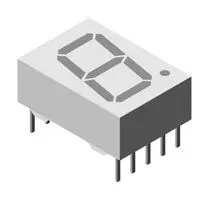

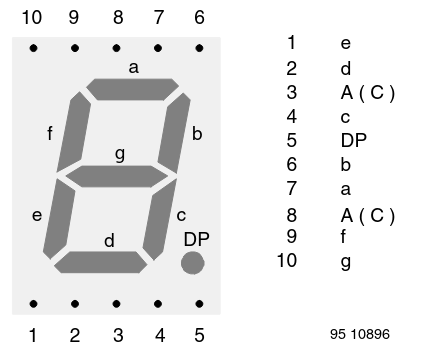

# Assingments

## Assignment 1: Test the 7-Segment Display code

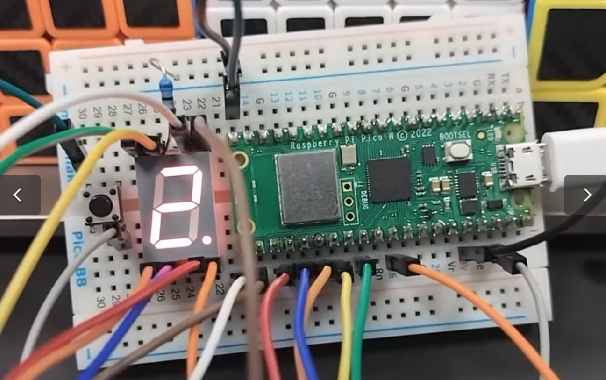

### 1.1: Run the dummy Pin Class
> This dummy class is for testing only

This imports a dummy ```Pin``` class from the machine module, which allows to simulate control over the GPIO pins.

__Remember__ to import the following, when tesing on the Raspberry Pi Pico / Pico W:

```
from machine import Pin
```

In [3]:
class Pin:
    # Pin modes
    IN = 0
    OUT = 1
    OPEN_DRAIN = 2
    ALT = 3
    ALT_OPEN_DRAIN = 4
    ANALOG = 5

    # Pin pull modes
    PULL_UP = 0x10
    PULL_DOWN = 0x20
    PULL_HOLD = 0x30

    def __init__(self, pin, mode=-1, pull=-1, value=None, drive=0, alt=-1):
        """
        Initialize a Pin object.

        Parameters:
            pin (int): The pin number.
            mode (int): The pin mode (IN, OUT, etc.).
            pull (int): The pull mode (PULL_UP, PULL_DOWN, etc.).
            value (int, optional): The initial pin value.
            drive (int): The drive strength.
            alt (int): Alternate function.
        """
        self._pin = pin
        self._mode = mode
        self._pull = pull
        self._value = value
        self._drive = drive
        self._alt = alt

    def init(self, mode=-1, pull=-1, value=None, drive=0, alt=-1):
        """
        Re-initialize the pin.

        Parameters:
            mode (int): The pin mode (IN, OUT, etc.).
            pull (int): The pull mode (PULL_UP, PULL_DOWN, etc.).
            value (int, optional): The initial pin value.
            drive (int): The drive strength.
            alt (int): Alternate function.
        """
        self._mode = mode
        self._pull = pull
        self._value = value
        self._drive = drive
        self._alt = alt

    def value(self, x=None):
        """
        Get or set the value of the pin.

        Parameters:
            x (int, optional): The value to set (0 or 1).

        Returns:
            int: The current value of the pin.
        """
        if x is None:
            return self._value
        else:
            self._value = x

    def on(self):
        """Set the pin value to 1."""
        self._value = 1

    def off(self):
        """Set the pin value to 0."""
        self._value = 0

    def toggle(self):
        """Toggle the pin value."""
        self._value = 1 if self._value == 0 else 0


### 1.2: Test the 7-Segment Display (0 - 3) example using Dummy classes



In [5]:
# Define the inverted segments for each digit (0-3)
digit_to_segments = {
    0: [0, 0, 0, 0, 0, 0, 1],
    1: [1, 0, 0, 1, 1, 1, 1],
    2: [0, 0, 1, 0, 0, 1, 0],
    3: [0, 0, 0, 0, 1, 1, 0],
    # 4: [?, ?, ?, ?, ?, ?, ?],
    # 5: [?, ?, ?, ?, ?, ?, ?],
    # 6: [?, ?, ?, ?, ?, ?, ?],
    # 7: [?, ?, ?, ?, ?, ?, ?],
    # 8: [?, ?, ?, ?, ?, ?, ?],
    # 9: [?, ?, ?, ?, ?, ?, ?]
}

# Define the GPIO pins connected to the 7-segment display segments [A, B, C, D, E, F, G]
# Example:
#   A = GP6
#   B = GP7
#   C = GP8
#   D = GP9
#   E = GP10
#   F = GP11
#   G = GP12
pins = [6, 7, 8, 9, 10, 11, 12]

# Initialize the pins
segments = [Pin(pin, Pin.OUT) for pin in pins]

def display(digit=0):
    """Display a digit (0-9) on the 7-segment display.

    Args:
        digit (int): The digit to display (0-9).
    """
    if digit < 0 or digit > len(digit_to_segments) - 1:
        raise ValueError("Digit must be between 0 and {}".format(len(digit_to_segments) - 1))

    segments_state = digit_to_segments[digit]
    for segment, state in zip(segments, segments_state):
        segment.value(state)

    print("{}: {}".format(digit, digit_to_segments[digit]))

### 1.3: Unit testing

Display a single number

In [6]:
display(0)

0: [0, 0, 0, 0, 0, 0, 1]


Counting up

In [7]:
import time

for cnt in range(len(digit_to_segments)):
    display(cnt)
    time.sleep(1)


0: [0, 0, 0, 0, 0, 0, 1]
1: [1, 0, 0, 1, 1, 1, 1]
2: [0, 0, 1, 0, 0, 1, 0]
3: [0, 0, 0, 0, 1, 1, 0]


Counting down

In [8]:
import time

for cnt in range(3,-1,-1):
    display(cnt)
    time.sleep(1)

3: [0, 0, 0, 0, 1, 1, 0]
2: [0, 0, 1, 0, 0, 1, 0]
1: [1, 0, 0, 1, 1, 1, 1]
0: [0, 0, 0, 0, 0, 0, 1]


## Assignment 2: Circuit Setup


1. Place your Raspberry Pi Pico and the 7-segment display on a breadboard

2. Identify the pins of the 7-Segment Display, and connect each segment pin (a to g) and dp (decimal point) of the 7-segment display to the GPIO pins of your microcontroller.

3. Connect the common pin (C) of the display to the power. Remember to add a suitable resistor.

4. Run the full code example below, and validate that it passes the unit testing examples.


### Full code example
> __Note:__ This example will not work in a Jupyter Notebook since ```machine``` is a MicroPython-specific module. The example is ment for executing it on the physical device.

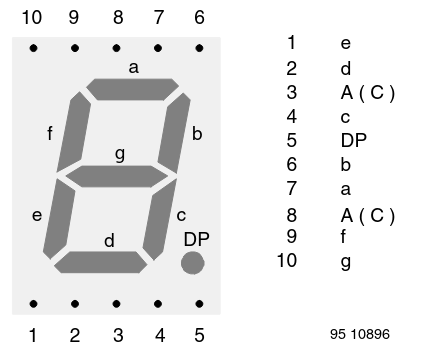

In [ ]:
from machine import Pin
import time

# Define the inverted segments for each digit (0-9)
digit_to_segments = {
    0: [0, 0, 0, 0, 0, 0, 1],
    1: [1, 0, 0, 1, 1, 1, 1],
    2: [0, 0, 1, 0, 0, 1, 0],
    3: [0, 0, 0, 0, 1, 1, 0],
    # 4: [?, ?, ?, ?, ?, ?, ?],
    # 5: [?, ?, ?, ?, ?, ?, ?],
    # 6: [?, ?, ?, ?, ?, ?, ?],
    # 7: [?, ?, ?, ?, ?, ?, ?],
    # 8: [?, ?, ?, ?, ?, ?, ?],
    # 9: [?, ?, ?, ?, ?, ?, ?]
}

# Define the GPIO pins connected to the 7-segment display segments [A, B, C, D, E, F, G]
# Example: A = GP6, B = GP, C = GP8, D = GP, E = GP10, F = GP11, G = GP12
pins = [6, 7, 8, 9, 10, 11, 12]

# Initialize the pins
segments = [Pin(pin, Pin.OUT) for pin in pins]

def display(digit=0):
    """Display a digit (0-9) on the 7-segment display.

    Args:
        digit (int): The digit to display (0-9).
    """
    if digit < 0 or digit > len(digit_to_segments) - 1:
        raise ValueError("Digit must be between 0 and {}".format(len(digit_to_segments) - 1))

    segments_state = digit_to_segments[digit]
    for segment, state in zip(segments, segments_state):
        segment.value(state)

    print("{}: {}".format(digit, digit_to_segments[digit]))

# Example usage:
display(3)
time.sleep(10) # Display for 10 seconds

# Counting up
for cnt in range(len(digit_to_segments)):
    display(cnt)
    time.sleep(1)

# Counting down
for cnt in range(3,-1,-1):
    display(cnt)
    time.sleep(1)

# Coffee break !!!

## Assignment 3: Define the remaining segments for each digit

Define the remaining digits and verify it using the circuit

In [1]:
# Define the inverted segments for each digit (0-9)
digit_to_segments = {
    0: [0, 0, 0, 0, 0, 0, 1],
    1: [1, 0, 0, 1, 1, 1, 1],
    2: [0, 0, 1, 0, 0, 1, 0],
    3: [0, 0, 0, 0, 1, 1, 0],
    4: [1, 0, 0, 1, 1, 0, 0],
    5: [0, 1, 0, 0, 1, 0, 0],
    6: [0, 1, 0, 0, 0, 0, 0],
    7: [0, 0, 0, 1, 1, 1, 1],
    8: [0, 0, 0, 0, 0, 0, 0],
    9: [0, 0, 0, 0, 1, 0, 0]
}

## Assignment 4: Count from 0 to 9 while the decimal point blink every 2 seconds


To make the decimal point (dp) blink every second while the 7-segment display shows numbers from 0 to 9 while counting up or down:
* the display should be able to count from 0 to 9, and then start over.
* the display should be able to count from 9 to 0, and then start over.
* the display should be able to count up/down every 2 seconds.

## Assignment 5: Integrate a button in the circuit


Integrate a button in the circuit that changes the count direction (from counting up to counting down and vice versa). The button will be used to toggle the counting direction whenever it is pressed.

## (Optional) Assignment 6: Document your work

* Insert comments in your
* Draw your wiring setup, eg. by hand and include a image for the drawing or using [Fritzing](https://fritzing.org/)






## Video
Link to video: (https://youtube.com/shorts/4QXlm3NYHTk)



## Wiring setup
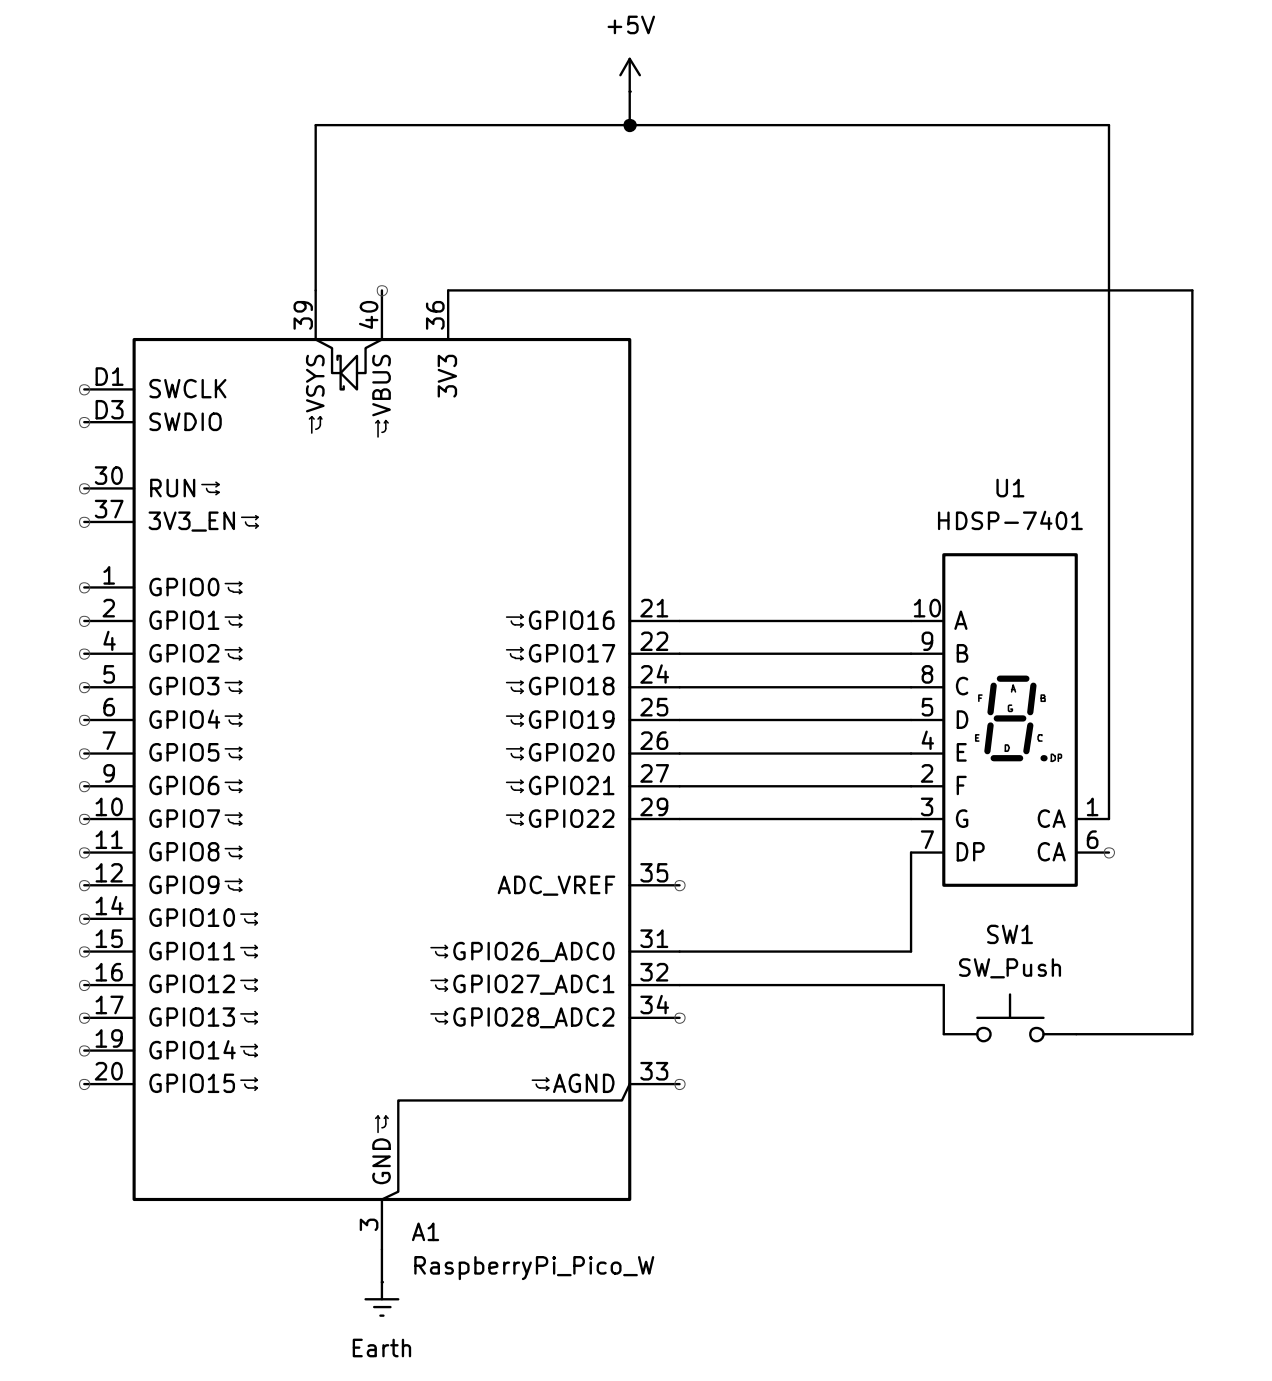

## Source code

Insert your source code below:

In [ ]:
# Import necessary libraries
from machine import Pin, Timer
import time

# Define the different digits of the display (0-9)
digit_to_segments = {
    0: [0, 0, 0, 0, 0, 0, 1],
    1: [1, 0, 0, 1, 1, 1, 1],
    2: [0, 0, 1, 0, 0, 1, 0],
    3: [0, 0, 0, 0, 1, 1, 0],
    4: [1, 0, 0, 1, 1, 0, 0],
    5: [0, 1, 0, 0, 1, 0, 0],
    6: [0, 1, 0, 0, 0, 0, 0],
    7: [0, 0, 0, 1, 1, 1, 1],
    8: [0, 0, 0, 0, 0, 0, 0],
    9: [0, 0, 0, 0, 1, 0, 0]
}

# GPIO setup
pins = [16, 17, 18, 19, 20, 21, 22]
segments = [Pin(pin, Pin.OUT) for pin in pins]
dot = Pin(26, Pin.OUT)
button = Pin(27, Pin.IN, Pin.PULL_DOWN)

# Variable declaration 
counter = 0
direction = 1 # Start by counting up 
debounce = 0
tick_count = 0


def display(digit):
    """
    Display a digit (0-9) on the 7-segment display.

    Args:
        digit (int): The digit to display (0-9).
    """
    if digit < 0 or digit > len(digit_to_segments) - 1:
        raise ValueError("Digit must be between 0 and {}".format(len(digit_to_segments) - 1))
    
    for segment, state in zip(segments, digit_to_segments[digit]):
        segment.value(state)
    # Give user feedback in the terminal
    print("Display:", digit)

def handle_button_interrupt(pin):
    """
    Handle input from button using the interrupt function.
    Implements debounce in to make sure that the input is as correct as possible. 
    
    Args:
        pin (int): The button pin
    """
    
    global direction, debounce
    # Fetch current time
    current_time = time.ticks_ms()
    
    # Calculate difference between the current time and the debounce
    if time.ticks_diff(current_time, debounce) > 150:
        if pin.value() == 1:
            direction *= -1
            debounce = current_time

def tick(timer):
    """
    Handles time in the code.
    It utilizes the timer interrupt to track the counter which then updates the display.
    
    Args:
        timer (machine.Timer): Timer class from Machine library
    
    """
    # Fetch global variables
    global counter, direction, dot_state, tick_count

    # Toggle dot every tick
    dot.toggle()

    # Update counter every 2 ticks (every 2 seconds)
    if tick_count % 2 == 0:
        display(counter)
        # Changer counter with the value of direction (either +1 or -1)
        counter += direction
        if counter > 9:
            counter = 0
        elif counter < 0:
            counter = 9
        # Give user feedback in the terminal
        print("Counter:", counter)
    
    # Update tick count to track for next loop
    tick_count += 1

# Setup of interrupt
# We set the handlerreference to the handle_button_interrupt function. 
button.irq(trigger=Pin.IRQ_RISING, handler=handle_button_interrupt)

# Every tick the timer calls the tick function declared earlier. 
Timer().init(freq=1, mode=Timer.PERIODIC, callback=tick)